# Compare metrics

In this file, we compare the various results across datasets, runs, seeding to see the variability of the experiment.

## Libraries

In [1]:
import json
import os

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from copy import deepcopy

## Parameters

In [2]:
enrolls = ['scanner', 'iphone', 'samsung']
authenticates = ['scanner', 'iphone', 'samsung']
modes = ['no_processing', 'normalize', 'stretch', 'hist_match']
runs = ['0', '1', '2', '100']
seeds = ['0', '1']

save_figures = False
matplotlib.rcParams.update({'font.size':50})
thresholds = [1, .5, .1, .01, .001]

## Loading the metrics

In [4]:
measures = {enroll: {} for enroll in enrolls}


for enroll in enrolls:
    measures[enroll] = {authenticate: {} for authenticate in authenticates}
    for authenticate in authenticates:
        measures[enroll][authenticate] = {mode: {} for mode in modes}
        for mode in modes:
            measures[enroll][authenticate][mode] = {run: {} for run in runs}
            for run in runs:
                measures[enroll][authenticate][mode][run] = {seed: {} for seed in seeds}

roc_curves = deepcopy(measures)

for enroll in enrolls:
    for authenticate in authenticates:
        for mode in modes:
            for run in runs:
                for seed in seeds:
                    path = f'TIFS_train_{enroll}_test_{authenticate}_run_{run}_estimator_otsu_processing_{mode}_seed_{seed}.json'

                    if os.path.exists(f'results/metrics/measures_data/{path}'):
                        with open(f'results/metrics/measures_data/{path}', "r") as fp:
                            measures[enroll][authenticate][mode][run][seed] = json.load(fp)
                    if os.path.exists(f'results/metrics/roc_curves_data/{path}'):
                        with open(f'results/metrics/roc_curves_data/{path}', "r") as fp:
                            roc_curves[enroll][authenticate][mode][run][seed] = json.load(fp)


## Visualize results

Visualize histograms

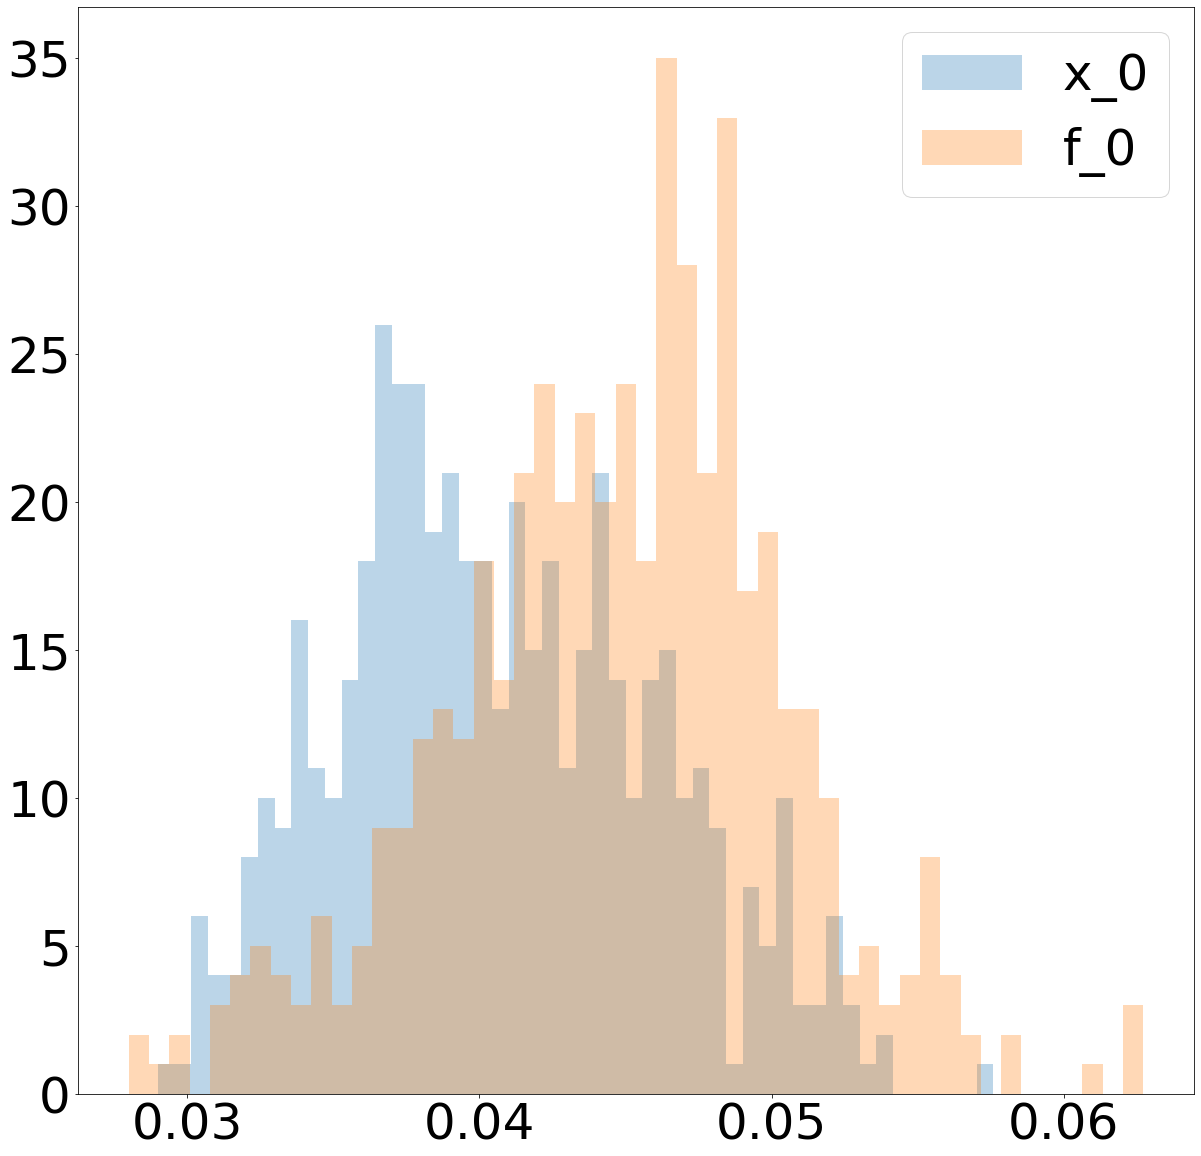

In [7]:
plt.figure(figsize=(20,20))

chosen_metric = 'mse'
thresh = '0.001'
mode = 'no_processing'

plt.hist(measures['iphone']['iphone'][mode]['1']['0'][chosen_metric][f'thresh_{thresh}']['x'], alpha=.3, label='x_0', bins=50)
plt.hist(measures['iphone']['iphone'][mode]['1']['0'][chosen_metric][f'thresh_{thresh}']['f'], alpha=.3, label='f_0', bins=50)

plt.legend()
plt.show()

Visualize ROC curves (normal scale)

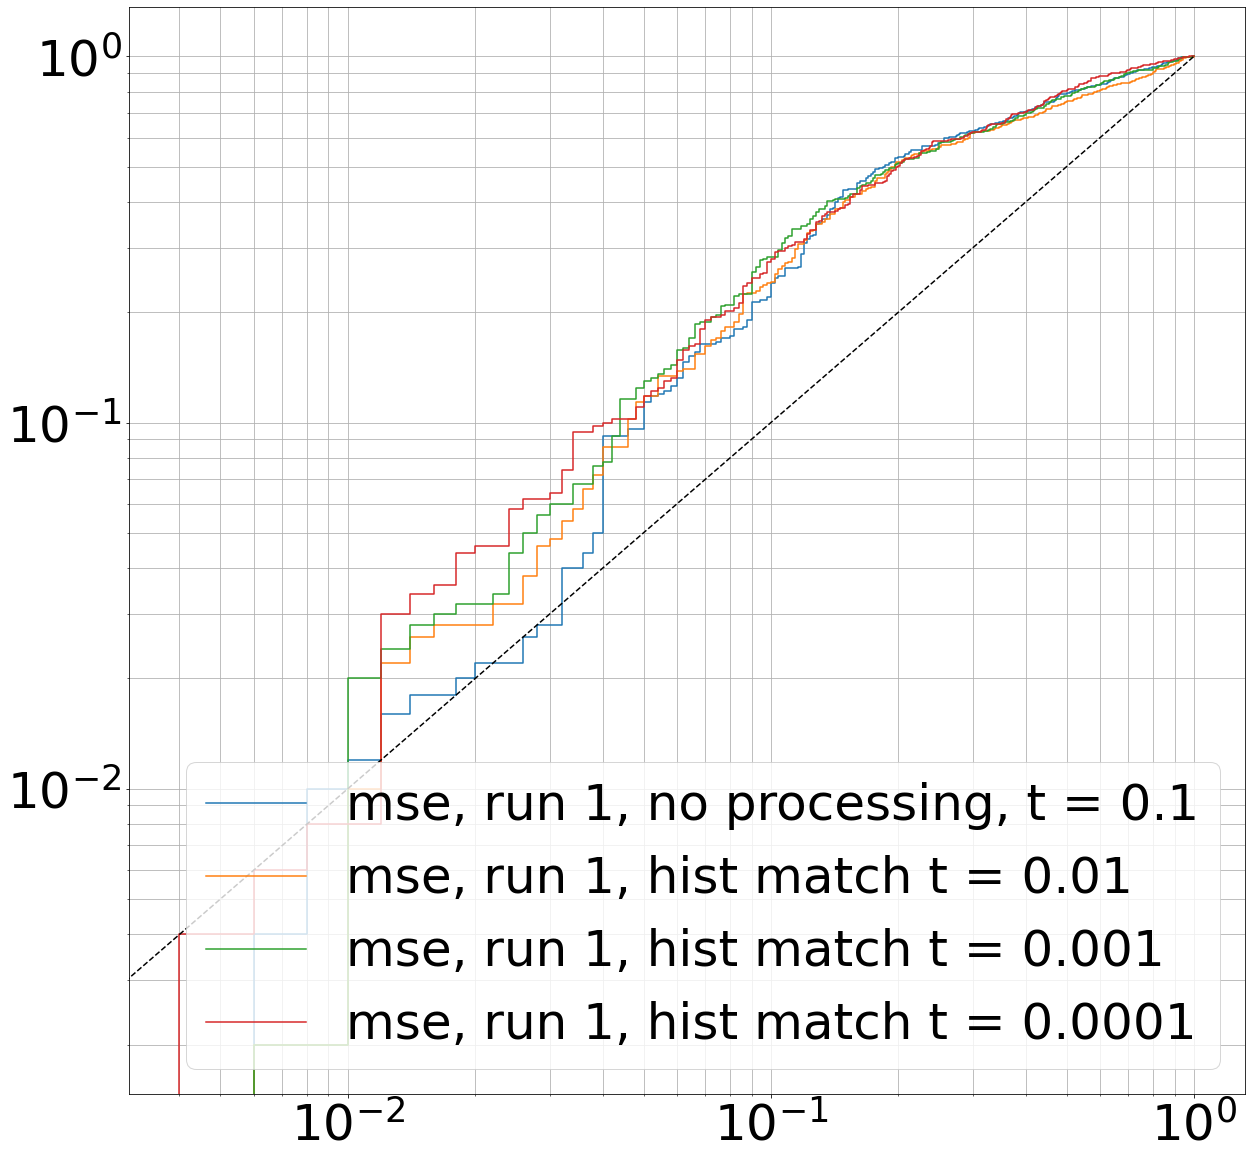

In [14]:
plt.figure(figsize=(20,20))

enroll = 'iphone'
authenticate = 'iphone'
chosen_metric = 'mse'

roc_1 = roc_curves[enroll][authenticate]['hist_match']['1']['0'][chosen_metric][f'thresh_{.1}']
roc_2 = roc_curves[enroll][authenticate]['hist_match']['1']['0'][chosen_metric][f'thresh_{.01}']
roc_3 = roc_curves[enroll][authenticate]['hist_match']['1']['0'][chosen_metric][f'thresh_{.001}']
roc_4 = roc_curves[enroll][authenticate]['hist_match']['1']['0'][chosen_metric][f'thresh_{.0001}']

plt.loglog(roc_1[0], roc_1[1], label=f'{chosen_metric}, run 1, no processing, t = {.1}')
plt.loglog(roc_2[0], roc_2[1], label=f'{chosen_metric}, run 1, hist match t = {.01}')
plt.loglog(roc_3[0], roc_3[1], label=f'{chosen_metric}, run 1, hist match t = {.001}')
plt.loglog(roc_4[0], roc_4[1], label=f'{chosen_metric}, run 1, hist match t = {.0001}')

plt.plot([0,1], [0,1], 'k--')
plt.grid(which='both')
plt.legend()
plt.show()

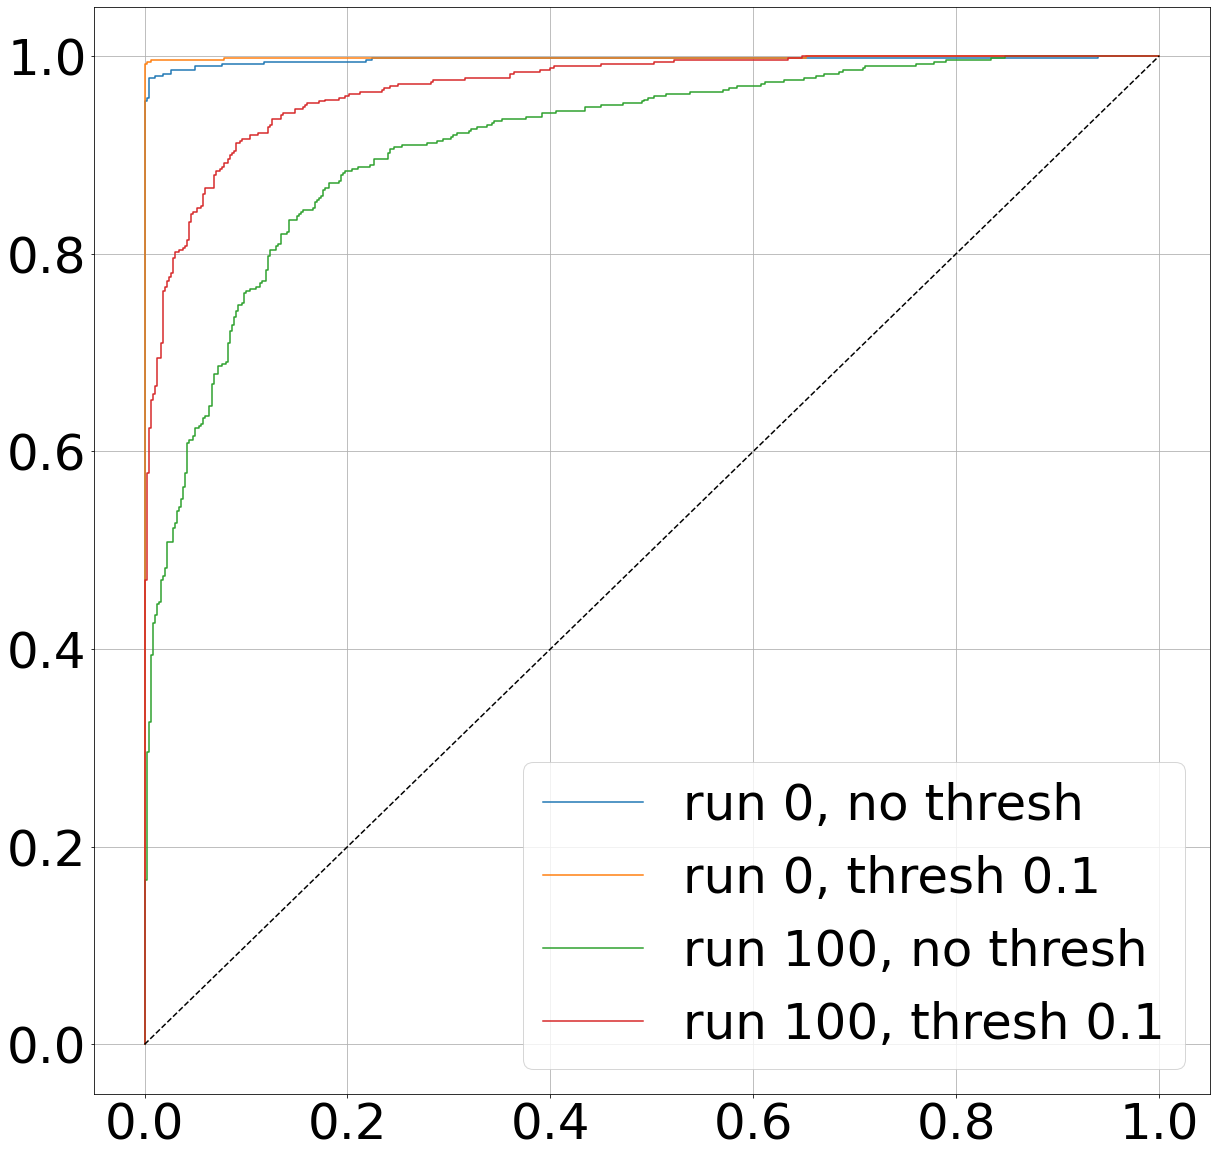

In [9]:
plt.figure(figsize=(20,20))

chosen_metric = 'lls'
thresh = '0.01'

roc_1 = roc_curves['scanner']['scanner']['no_processing']['0']['0'][chosen_metric][f'thresh_{1}']
roc_2 = roc_curves['scanner']['scanner']['no_processing']['0']['0'][chosen_metric][f'thresh_{0.01}']
roc_3 = roc_curves['scanner']['scanner']['no_processing']['100']['0'][chosen_metric][f'thresh_{1}']
roc_4 = roc_curves['scanner']['scanner']['no_processing']['100']['0'][chosen_metric][f'thresh_{0.01}']

plt.plot(roc_1[0], roc_1[1], label='run 0, no thresh')
plt.plot(roc_2[0], roc_2[1], label='run 0, thresh 0.1')
plt.plot(roc_3[0], roc_3[1], label='run 100, no thresh')
plt.plot(roc_4[0], roc_4[1], label='run 100, thresh 0.1')

plt.plot([0,1], [0,1], 'k--')
plt.grid(which='both')
plt.legend()
plt.show()

Visualize ROC curves (log scale)

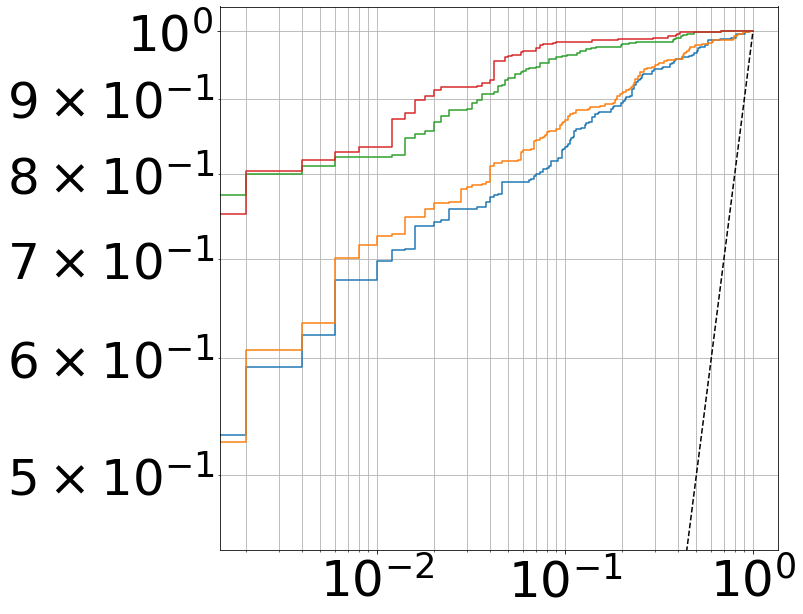

In [27]:
plt.figure(figsize=(10,10))

chosen_metric = 'mse'
thresh = '0.5'

roc_1 = roc_curves['scanner']['scanner']['no_processing']['0']['0'][chosen_metric][f'thresh_{thresh}']
roc_2 = roc_curves['scanner']['scanner']['no_processing']['0']['1'][chosen_metric][f'thresh_{thresh}']
roc_3 = roc_curves['scanner']['scanner']['no_processing']['1']['0'][chosen_metric][f'thresh_{thresh}']
roc_4 = roc_curves['scanner']['scanner']['no_processing']['1']['1'][chosen_metric][f'thresh_{thresh}']

plt.loglog(roc_1[0], roc_1[1])
plt.loglog(roc_2[0], roc_2[1])
plt.loglog(roc_3[0], roc_3[1])
plt.loglog(roc_4[0], roc_4[1])
plt.loglog([0,1], [0,1], 'k--')
plt.grid(which='both')

plt.show()

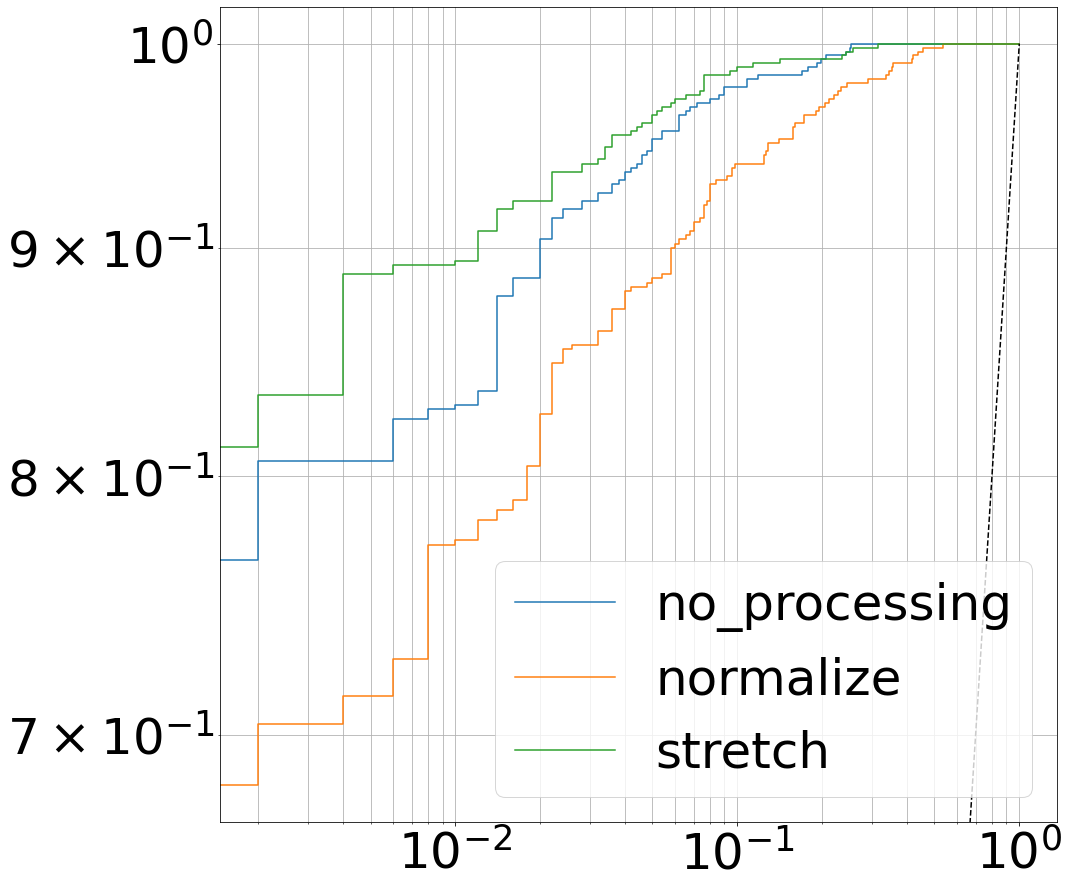

In [19]:
plt.figure(figsize=(15,15))

chosen_metric = 'mse'
thresh = '1'

roc_1 = roc_curves['scanner']['scanner']['no_processing']['1']['0'][chosen_metric][f'thresh_{thresh}']
roc_2 = roc_curves['scanner']['scanner']['normalize']['1']['0'][chosen_metric][f'thresh_{thresh}']
roc_3 = roc_curves['scanner']['scanner']['stretch']['1']['0'][chosen_metric][f'thresh_{thresh}']

plt.loglog(roc_1[0], roc_1[1], label='no_processing')
plt.loglog(roc_2[0], roc_2[1], label='normalize')
plt.loglog(roc_3[0], roc_3[1], label='stretch')
plt.loglog([0,1], [0,1], 'k--')
plt.grid(which='both')

plt.legend()
plt.show()

Visualize Probability of Error

In [35]:
plt.figure(figsize=(10,10))

i = 0

for thresh in measures[chosen_metric].keys():
    fpr, tpr, gamma = rocs[chosen_metric][thresh]

    fpr = np.array(fpr)
    tpr = np.array(tpr)
    p_error = (1 + fpr - tpr) / 2
    plt.loglog(gamma[1:], p_error[1:], label=r'$\mu = $' + f'{thresholds[i]}')

    i+=1

plt.title(chosen_metric)
plt.grid(which='both')
plt.xlabel(r'threshold $\gamma$')
plt.ylabel(r'Probability of error $P_e$')

if save_figures:
    plt.savefig(f'results/metrics/graphics/prob_error_curves/train_{enroll}_test_{authenticate}_{chosen_metric}_{path}.pdf', bbox_inches="tight")

plt.show()

KeyError: 'lls'

<Figure size 720x720 with 0 Axes>

Generate the legend of plots

/tmp/ipykernel_16894/2265850747.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figlegend.show()


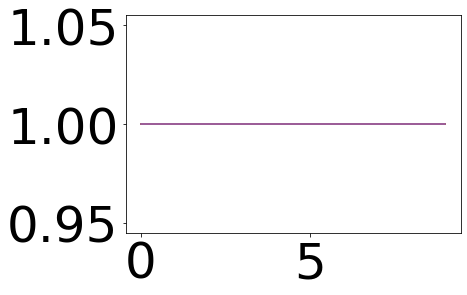

<Figure size 360x360 with 0 Axes>

In [235]:
fig = plt.figure()
figlegend = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

lines = ax.plot(range(10), np.ones([10]),
                range(10), np.ones([10]),
                range(10), np.ones([10]),
                range(10), np.ones([10]),
                range(10), np.ones([10]))

figlegend.legend(lines, (r'$\mu = 1$', r'$\mu = 0.5$', r'$\mu = 0.1$', r'$\mu = 0.01$', r'$\mu = 0.001$'), 'center')
figlegend.show()
figlegend.savefig('results/metrics/legend_mu.pdf')